# AutoARIMA em Python (BIBLIOTECA *PMDARIMA*)

Uma das metodologias mais conhecidas em séries temporais é a Box-Jenkins, que são um conjunto de procedimentos que são realizados em uma certa sequência até encontramos o melhor modelo ARIMA. Porém, ao invés de realizarmos as etapas dessa metodologia, podemos escolher o modelo de forma automática e para isso existe a função auto.arima que é muito usada no software estatístico R. 

O objetivo desse pequeno projeto é usar o autoarima do pacote pmdarima (que não é um pacote muito conhecido do python) para previsão de séries temporais. Uma das vantagens do autoarima é que não é necessário interpretar as funções de autocorrelação e autocorrelação parcial para escolher o parâmetros p, P, d, D, q e Q. Podemos definí-los e o autoarima irá fazer as combinações desses parâmetros e gerará os AIC's e escolhe-se então o modelo de menor AIC.

Usaremos uma base de dados de uma série temporal de consumo de energia elétrica que pode ser obtida [aqui](https://www.kaggle.com/zero101010/consumo-eletricocsv). A série tem periodicidade mensal e vai do ano de 1985 até o ano de 2017.

## Importando das bibliotecas

In [40]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.metrics import mean_squared_error
from statsmodels.stats.stattools import jarque_bera
import matplotlib.pyplot as plt
%matplotlib inline

from pmdarima.arima import auto_arima

In [41]:
from matplotlib.pyplot import rcParams
rcParams['figure.figsize']=15,6

## Importando da base de dados

Irei colocar os dados indexados no formato de tempo correto.

In [42]:
dateparse= lambda dates:pd.datetime.strptime(dates,'%m-%d-%Y')

Importando os dados.

In [43]:
data=pd.read_csv("datasets/countries/mortes_covid19_brazil_date.csv",encoding='utf-8',index_col='date')

Visualizando a base de dados.

In [44]:
data.head(10)

,Brazil
date,
3/17/20,1
3/18/20,3
3/19/20,6
3/20/20,11
3/21/20,15
3/22/20,25
3/23/20,34
3/24/20,46
3/25/20,59


Últimas observações da série.

In [45]:
data.tail(10)

,Brazil
date,
12/22/21,618366
12/23/21,618492
12/24/21,618655
12/25/21,618686
12/26/21,618732
12/27/21,618797
12/28/21,618978
12/29/21,619095
12/30/21,619249


Dimensão da base de dados : tempos 1 coluna com 397 observações.

In [46]:
data.shape

(655, 1)

Informações sobre a base de dados.

In [47]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 655 entries, 3/17/20 to 12/31/21
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Brazil  655 non-null    int64
dtypes: int64(1)
memory usage: 10.2+ KB


Abaixo podemos ver a tabela estatística.

In [48]:
data.describe()

,Brazil
count,655.000000
mean,300281.007634
std,218671.709673
min,1.000000
25%,119248.500000
50%,231684.000000
75%,545232.000000
max,619334.000000


Por fim, vamos visualizar graficamente a base de dados.

Vemos que ela tem uma tendência, vai subindo e ao final se estabiliza e também deve-se notar a forte presença de saznalidade.

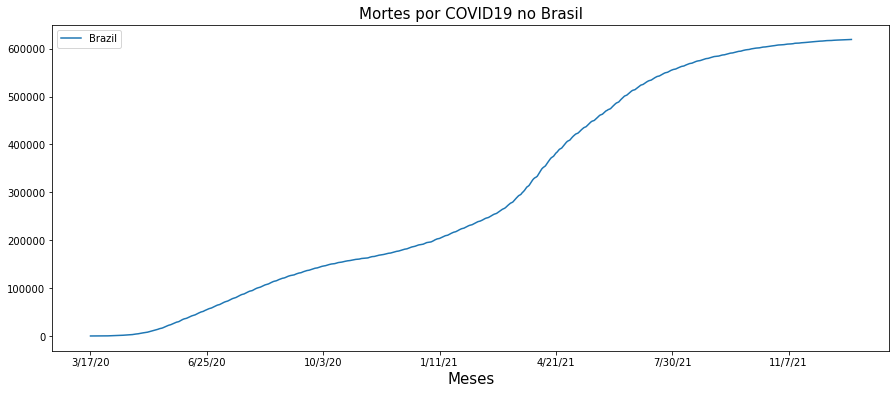

In [49]:
data.plot()
plt.xlabel('Meses',size=15)
plt.ylabel('')
plt.title('Mortes por COVID19 no Brasil',size=15)
plt.show()

## Aplicando o AutoARIMA

Escolherei os parâmetros *p, d, q, P, D* e *Q*:

1) o *p* vai variar entre 1 e 6;

2) o *q* vai variar entre 1 e 6;

3) a sazonalidade será mensal (m=12);

4) o *P* iniciará em 0 e o máximo, por padrão, será 2;

5) o *Q* por padrão será 1 e o máximo, por padrão, será 2;

6) o *d* será 1 e o máximo, por padrão, será 2;

7) o *D* será 1, por padrão já é 1.

Vamos agora aplicar o processamento do *autoARIMA*.

Vamos atribuir a uma variável o *autoARIMA*, que gerará vários modelos ARIMA e os seus respectivos AIC's e BICS (critérios de informação).

In [50]:
stepwise=auto_arima(data,start_p=1,start_q=1,max_p=6,max_q=6,m=22,start_P=0,seasonal=True,d=1,D=1,trace=True,
                    error_action='ignore',suppress_warnings=True,stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=inf, Time=1.17 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=10091.313, Time=0.09 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=9793.490, Time=0.29 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=9600.985, Time=0.43 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=9789.188, Time=0.11 sec
 ARIMA(0,1,1)(1,1,1)[12]             : AIC=9602.985, Time=0.67 sec
 ARIMA(0,1,1)(0,1,2)[12]             : AIC=9602.985, Time=1.31 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=9680.931, Time=0.32 sec
 ARIMA(0,1,1)(1,1,2)[12]             : AIC=inf, Time=5.67 sec
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=9964.275, Time=0.29 sec
 ARIMA(0,1,2)(0,1,1)[12]             : AIC=9554.249, Time=0.81 sec
 ARIMA(0,1,2)(0,1,0)[12]             : AIC=9789.076, Time=0.17 sec
 ARIMA(0,1,2)(1,1,1)[12]             : AIC=9545.802, Time=0.94 sec
 ARIMA(0,1,2)(1,1,0)[12]             : AIC=9631.943, Time=0.52 sec
 ARIMA(0,1,2)(2,1,1)[12]    

O modelo que foi gerado é um *SARIMA*(1,1,1)x(2,1,2,12).

In [51]:
stepwise

ARIMA(order=(0, 1, 2), scoring_args={}, seasonal_order=(2, 1, 2, 12),
      suppress_warnings=True, with_intercept=False)

Esse foi o model com menor *AIC* gerado.

In [52]:
stepwise.aic()

9529.745671394145

Podemos gerar ainda mais modelos colocando o parâmetro *stepwise* com *False*.

In [53]:
stepwise1=auto_arima(data,start_p=1,start_q=1,max_p=6,max_q=6,m=23,start_P=0,seasonal=True,d=1,D=1,trace=True,
                    error_action='ignore',suppress_warnings=True,stepwise=False)

 ARIMA(0,1,0)(0,1,0)[23]             : AIC=10049.473, Time=0.09 sec
 ARIMA(0,1,0)(0,1,1)[23]             : AIC=10000.740, Time=1.23 sec
 ARIMA(0,1,0)(0,1,2)[23]             : AIC=9987.443, Time=5.52 sec
 ARIMA(0,1,0)(1,1,0)[23]             : AIC=10023.181, Time=0.78 sec
 ARIMA(0,1,0)(1,1,1)[23]             : AIC=inf, Time=3.94 sec
 ARIMA(0,1,0)(1,1,2)[23]             : AIC=9979.320, Time=9.53 sec
 ARIMA(0,1,0)(2,1,0)[23]             : AIC=9954.211, Time=3.49 sec
 ARIMA(0,1,0)(2,1,1)[23]             : AIC=9954.357, Time=2.70 sec
 ARIMA(0,1,0)(2,1,2)[23]             : AIC=9898.070, Time=12.90 sec
 ARIMA(0,1,1)(0,1,0)[23]             : AIC=9668.560, Time=0.34 sec
 ARIMA(0,1,1)(0,1,1)[23]             : AIC=9567.605, Time=2.42 sec
 ARIMA(0,1,1)(0,1,2)[23]             : AIC=9563.299, Time=7.85 sec
 ARIMA(0,1,1)(1,1,0)[23]             : AIC=9604.932, Time=1.40 sec
 ARIMA(0,1,1)(1,1,1)[23]             : AIC=inf, Time=4.81 sec
 ARIMA(0,1,1)(1,1,2)[23]             : AIC=9563.508, Time=22.41 sec


O modelo com menor *AIC* foi um pouco diferente do anterior, pois o componente sazonal *D* é 1 ao invés de 2.

In [ ]:
stepwise1

ARIMA(order=(3, 1, 0), scoring_args={}, seasonal_order=(2, 1, 0, 12),
      suppress_warnings=True, with_intercept=False)

O *AIC* desse modelo foi um pouco maior que o anterior.

In [ ]:
stepwise1.aic()

9488.701091804325

## Separando os dados de treino e de teste

Vamos agora usar o *autoARIMA* para gerar uma validação do modelo. Para isso iremos separar os dados em treino e teste. Os dados de treino serão usado para treinar o *autoARIMA* e os dados de teste para comparar com as preisões geradas. Vamos separar as 12 últimas observações para dados de teste.

Irei colocar os dados de treino de janeiro de 1985 até janeiro de 2016 e os dados de teste será de fevereiro de 2016 em diante.

In [ ]:
total = len(data)
t = int(total*0.33)
train=data.iloc[:-t]
test=data.iloc[-t:]

Vamos treinar os modelos que geramos.

In [ ]:
stepwise.fit(train)
stepwise1.fit(train)

ARIMA(order=(3, 1, 0), scoring_args={}, seasonal_order=(2, 1, 0, 12),
      suppress_warnings=True, with_intercept=False)

Vamos gerar as previsões de cada modelo.

In [ ]:
future_forecast=stepwise.predict(len(test))
future_forecast1=stepwise1.predict(len(test))

Transformando as previsões em um *dataframe*.

In [ ]:
future_forecast=pd.DataFrame(future_forecast,index=test.index, columns=['previsão modelo 1'])
future_forecast1=pd.DataFrame(future_forecast1,index=test.index, columns=['previsão modelo 2'])

Visualizando o *dataset* de previsões.

In [ ]:
future_forecast.head(10)

,previsão modelo 1
date,
5/30/21,463434.045312
5/31/21,464600.854295
6/1/21,466099.163733
6/2/21,468207.898647
6/3/21,470588.993901
6/4/21,472437.824807
6/5/21,473987.911580
6/6/21,475954.810522
6/7/21,477258.192077


In [ ]:
future_forecast1.head(10)

,previsão modelo 2
date,
5/30/21,462768.848651
5/31/21,464520.435425
6/1/21,466646.730755
6/2/21,469267.601648
6/3/21,471771.063846
6/4/21,474241.273926
6/5/21,476116.319226
6/6/21,477888.387332
6/7/21,479425.278440


Comparando graficamente os valores reais com as previsões, vemos que os resultados das previsões parecem acompanhar bem o valores reais.

<Figure size 1440x360 with 0 Axes>

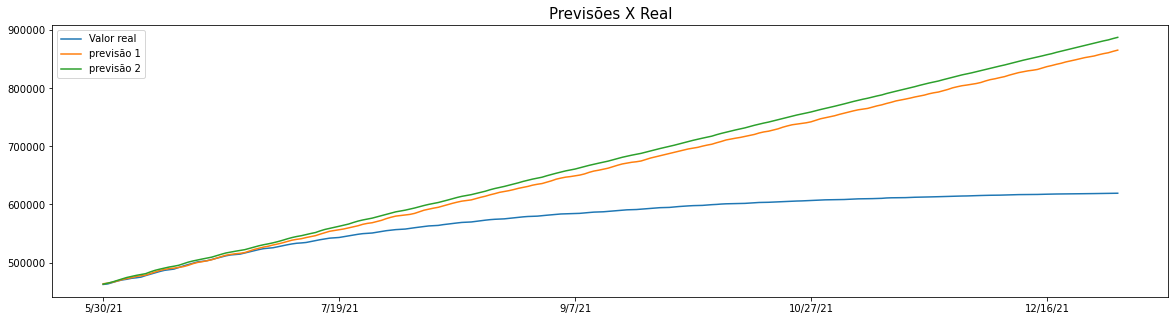

In [ ]:
plt.figure(figsize=(20,5))
pd.concat([test,future_forecast,future_forecast1],axis=1).plot(figsize=(20,5))
plt.xlabel('')
plt.title('Previsões X Real',size=15)
plt.legend(['Valor real','previsão 1','previsão 2'])
plt.show();

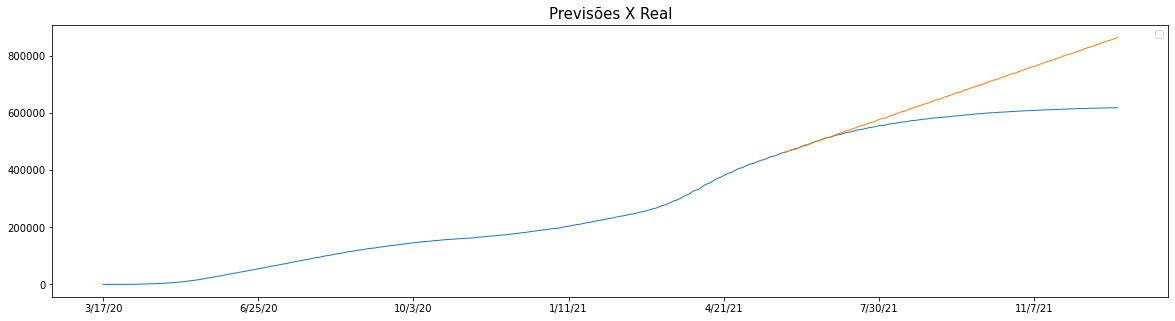

In [ ]:
pd.concat([data,future_forecast],axis=1).plot(linewidth=1,figsize=(20,5))
plt.legend('')
plt.xlabel('')
plt.title('Previsões X Real',size=15)
plt.show();

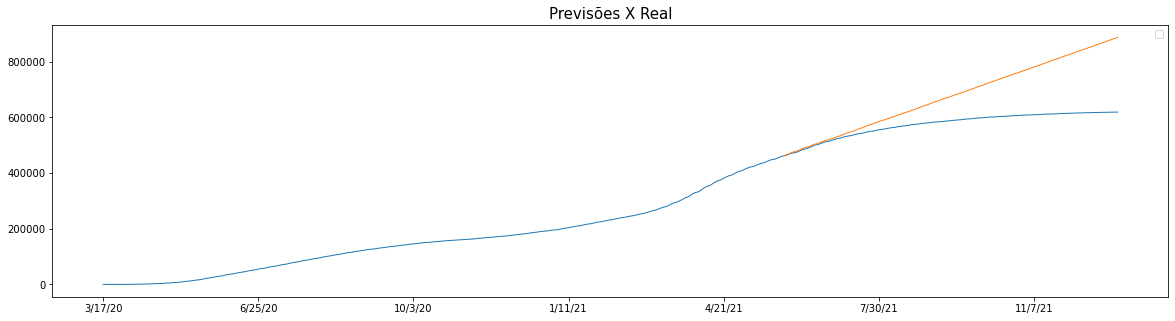

In [ ]:
pd.concat([data,future_forecast1],axis=1).plot(linewidth=1, figsize=(20,5))
plt.legend('')
plt.xlabel('')
plt.title('Previsões X Real',size=15)
plt.show();

## Sumário dos modelos

Abaixo podemos conferir os sumários dos modelos com seus coeficientes, estatísticas e p-valores.

Podemos ver que no sumário em *model* que no valor do *D* está [1,2], ou seja, já está informando a possibilidade de ser com *D* igual a 1 ou *D* igual a 2, mas o restante do sumário diz respeito ao modelo 1.

In [ ]:
stepwise.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  439
Model:             SARIMAX(0, 1, 2)x(2, 1, 2, 12)   Log Likelihood               -3191.737
Date:                            Sat, 22 Jan 2022   AIC                           6397.474
Time:                                    17:57:38   BIC                           6425.855
Sample:                                         0   HQIC                          6408.685
                                            - 439                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.6804      0.039     17.306      0.000       0.603       0.757
ma.L2          0.0550      0.043      1.285      0.199      -0.029       0.139
ar.S.L12      -0.4605      0.057     -8.128      0.000      -0.572      -0.349
ar.S.L24      -0.8975      0.048    -18.755      0.000      -0.991      -0.804
ma.S.L12       0.1112      0.077      1.437      0.151      -0.040       0.263
ma.S.L24       0.7732      0.060     12.870      0.000       0.655       0.891
sigma2      1.782e+05   8300.879     21.466      0.000    1.62e+05    1.94e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               735.33
Prob(Q):                              0.96   Prob(JB):                         0.00
Heteroskedasticity (H):               7.13   Skew:                            -1.01
Prob(H) (two-sided):                  0.00   Kurtosis:                         9.11
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Simário do modelo 2.

In [ ]:
stepwise1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  439
Model:             SARIMAX(3, 1, 0)x(2, 1, 0, 12)   Log Likelihood               -3163.859
Date:                            Sat, 22 Jan 2022   AIC                           6339.718
Time:                                    17:57:38   BIC                           6364.044
Sample:                                         0   HQIC                          6349.327
                                            - 439                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5561      0.030     18.460      0.000       0.497       0.615
ar.L2         -0.3837      0.025    -15.571      0.000      -0.432      -0.335
ar.L3          0.6384      0.028     22.844      0.000       0.584       0.693
ar.S.L12      -0.5118      0.023    -22.715      0.000      -0.556      -0.468
ar.S.L24      -0.8064      0.025    -32.159      0.000      -0.856      -0.757
sigma2      1.575e+05   6994.540     22.524      0.000    1.44e+05    1.71e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.14   Jarque-Bera (JB):               228.90
Prob(Q):                              0.71   Prob(JB):                         0.00
Heteroskedasticity (H):               7.02   Skew:                            -0.13
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.58
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

## Análise dos resíduos

Uma das principais etapas é a avaliação dos resíduos. Primeiramente vamos olhar o *rmse* que é umas das principais métricas para análise dos erros, onde ele compara valores reais com os preditos. Aqui é interessante que o resultado seja o mais próximo possível de zero.

Podemos ver que o modelo com melhor desempenho foi o modelo 1.

In [ ]:
print("RMSE do modelo 1: %.3f" % np.sqrt(mean_squared_error(test, future_forecast)))
print('')
print("RMSE do modelo 2: %.3f" % np.sqrt(mean_squared_error(test, future_forecast1)))

RMSE do modelo 1: 118852.204

RMSE do modelo 2: 131676.835


Calculando os erros de cada um dos modelos.

In [ ]:
erros=pd.DataFrame(np.array(future_forecast.values.tolist())-np.array(test.values.tolist()))

erros1=pd.DataFrame(np.array(future_forecast1.values.tolist())-np.array(test.values.tolist()))

Vamos ver graficamente a distribuião dos resíduos dos modelos: são bem semelhantes e se assemelham com uma distribuição normal.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


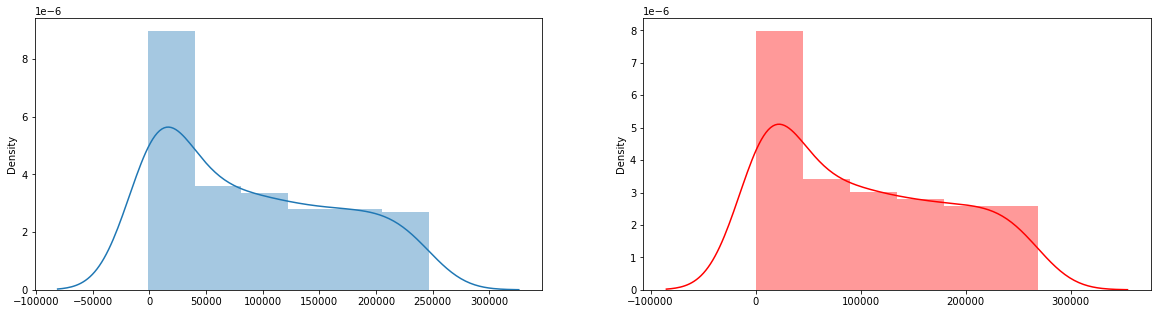

In [ ]:
fig, ax = plt.subplots(1,2,figsize=(20,5))
sns.distplot(erros,ax=ax[0])
sns.distplot(erros1,ax=ax[1], color='red');

Podemos usar também a função *plot_diagnostic* para gerar os resíduos, o histograma dos resíduos, o gráfico QQ e o correlograma dos resíduos.

Para o modelo *stepwise* podemos ver que os resíduos apresentam estar flutuando em torno do valor de zero e o seu histograma apresenta possuir um formato de sino. Vemos que o *KDE* do histograma está bem próximo do *KDE* de uma distribuição normal. No gráfio QQplot os valores estão, em sua maioria, em cima da linha vermelha, o que é uma evidência para normalidade; e por fim o correlograma não apresentou resultados estatisticamente significativo, rejeitando, então, a presença de autocorrelação serial.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


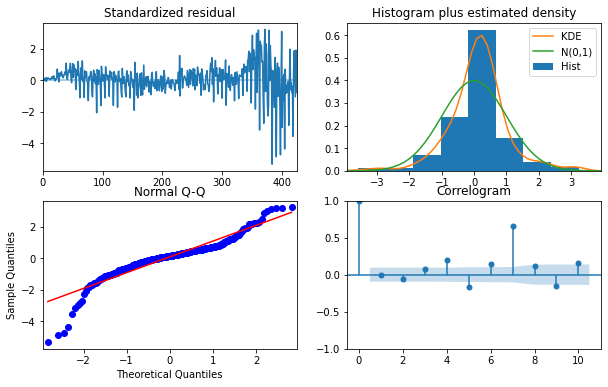

In [ ]:
stepwise.plot_diagnostics(figsize=(10,6));

Assim como o modelo *stepwise* o modelo *stepwise1* apresenta resultados semelhantes.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


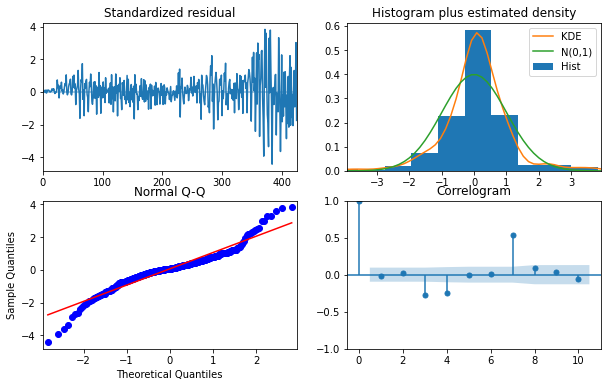

In [ ]:
stepwise1.plot_diagnostics(figsize=(10,6));

### Teste de normalidade dos resíduos

Para sabermos se a distribuição dos resíduos é ou não normal precisaremos realizar um teste estatístico chamado Teste de Normalidade *Jarque-Bera*. O teste Jarque-Bera testa se a distribuição dos dados é uma distribuição normal ($H_{0}$) em comparação com uma hipótese alternativa ($H_{1}$) em que os dados seguem alguma outra distribuição. A estatística do teste é baseada em dois momentos dos dados, a assimetria e a curtose, e possui uma $\chi^{2}_{2;1-\alpha}$ distribuição assintótica.

A estatística do teste Jarque-Bera é dada pela equação abaixo:

$S_{JB} = T\bigg[\frac{\alpha_{1}^{2}}{6} + \frac{\big(\alpha_{2} - 3\big)^{2}}{24} \bigg]$, onde $\alpha_{1}$ é o coeficiente de assimetria e $\alpha_{2}$ o coeficiente de curtose.

Se $S_{JB} > \chi^{2}_{2;1-\alpha}$, devemos rejeitar $H_{0}$.

Para o primeiro modelo o *p-value* teve um valor de 0.3746892, bem acima do nível de significância de 5% (que será o nosso padrão). Então podemos considerar que os resíduos do modelo 1 possuem uma distribuição normal.

In [ ]:
test = jarque_bera(erros)
print('Estatística Jarque-Bera :', test[0])
print('p-valor :', test[1])
print('Assimetria :', test[2])
print('Curtose :',test[3])

Estatística Jarque-Bera : [18.69247062]
p-valor : [8.72934342e-05]
Assimetria : [0.44358112]
Curtose : [1.86426925]


Para o modelo 2, o *p-value* foi um pouco maior (0.4257611) e também podemos considerar que seus resíduos são normais.

In [ ]:
test1 = jarque_bera(erros1)
print('Estatística Jarque-Bera :', test1[0])
print('p-valor :', test1[1])
print('Assimetria :', test1[2])
print('Curtose :',test1[3])

Estatística Jarque-Bera : [18.20247901]
p-valor : [0.00011153]
Assimetria : [0.41659655]
Curtose : [1.84748669]


## Conclusão

Para concluirmos levando em consideração a métrica de *RMSE* o modelo 1 foi melhor e pode ser escolhido para gerar previsões.

In [ ]:
stepwise.fit(data)

ARIMA(order=(0, 1, 2), scoring_args={}, seasonal_order=(2, 1, 2, 12),
      suppress_warnings=True, with_intercept=False)

Vamos criar 31 previsões para um futuro fora da séries original.

In [ ]:
future_forecast2=stepwise.predict(n_periods=31)

Vamos transformar em um *dataframe* e indexar para o tempo que queremos no futuro.

In [ ]:
future_forecast2=pd.DataFrame(future_forecast2,columns=['nova previsão'])

Vamos observar essas novas previsões.

In [ ]:
future_forecast2.head(31)

,nova previsão
0,619462.052219
1,619548.279537
2,619734.032967
3,619878.723796
4,620102.644646
5,620302.632226
6,620466.698002
7,620703.281639
8,620849.431794
9,621006.690595


E agora vamos ver graficamente.

<Figure size 1440x360 with 0 Axes>

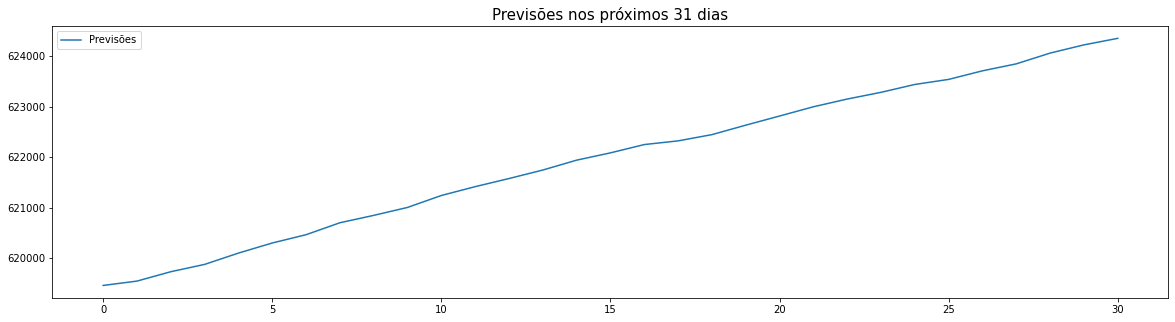

In [ ]:
plt.figure(figsize=(20,5))
pd.concat([future_forecast2],axis=1).plot(figsize=(20,5))
plt.xlabel('')
plt.title('Previsões nos próximos 31 dias',size=15)
plt.legend(['Previsões'])
plt.show();